In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.dropna(inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_day'] = df['pickup_datetime'].dt.day_of_week
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_year'] = df['pickup_datetime'].dt.year

In [4]:
def haversine(lat1, long1, lat2, long2):
    lat1, long1, lat2, long2 = map(np.radians, [lat1, long1, lat2, long2])
    diffLat = lat2-lat1
    diffLong = long2-long1
    a = np.sin(diffLat/2)**2 * np.cos(diffLong/2)**2 + np.cos((lat1 + lat2)/2)**2 * np.sin(diffLong/2)**2
    b = 2 * 6378 * np.arcsin(np.sqrt(a))
    return b

In [5]:
df['distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis = 1)

In [6]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_date,pickup_hour,pickup_year,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,3,2015-05-07,19,2015,1.685172
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,4,2009-07-17,20,2009,2.460290
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0,2009-08-24,21,2009,5.041911
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,4,2009-06-26,8,2009,1.663509
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,3,2014-08-28,17,2014,4.480367


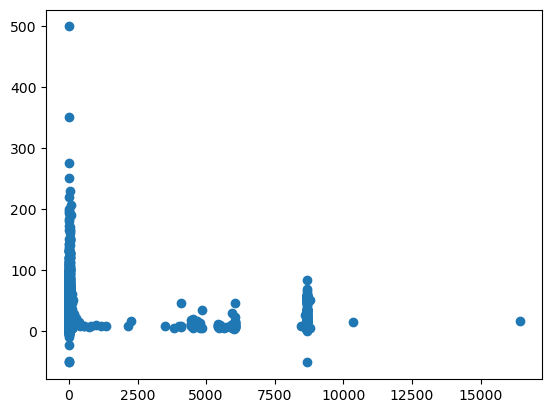

In [7]:
plt.scatter(df['distance'], df['fare_amount'])
plt.show()

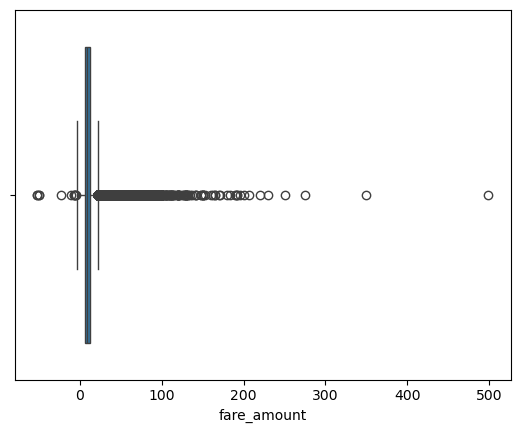

In [8]:
sns.boxplot(x=df['fare_amount'])
plt.show()

In [9]:
df.drop(df[df['distance'] == 0].index, inplace = True)
df.drop(df[df['distance'] > 60].index, inplace = True)
df.drop(df[df['fare_amount'] > 100].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)
df.drop(df[df['passenger_count'] > 6].index, inplace = True)
df.notna().sum()

Unnamed: 0           193786
key                  193786
fare_amount          193786
pickup_datetime      193786
pickup_longitude     193786
pickup_latitude      193786
dropoff_longitude    193786
dropoff_latitude     193786
passenger_count      193786
pickup_day           193786
pickup_date          193786
pickup_hour          193786
pickup_year          193786
distance             193786
dtype: int64

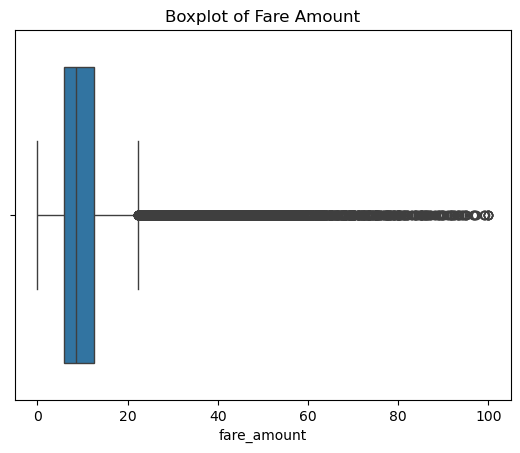

In [10]:
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

In [11]:
x = df[['distance', 'pickup_year']]
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [12]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
rmse_linear = np.sqrt(mean_squared_error(y_pred_linear, y_test))
r2_linear = r2_score(y_test, y_pred_linear)
print("RMSE : ", rmse_linear)
print("R2 : ", r2_linear)

RMSE :  4.225141428439892
R2 :  0.8000662308520311


In [13]:
rf_model = RandomForestRegressor(random_state=80)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rmse_rf = np.sqrt(mean_squared_error(y_pred_rf, y_test))
r2_rf = r2_score(y_test, y_pred_rf)
print("RMSE : ", rmse_rf)
print("R2 : ", r2_rf)

RMSE :  4.579760051553959
R2 :  0.7650967091608631


In [14]:
knn = KNeighborsRegressor(n_neighbors=140)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
rmse_knn = np.sqrt(mean_squared_error(y_pred_knn, y_test))
r2_knn = r2_score(y_test, y_pred_knn)
print("RMSE : ", rmse_knn)
print("R2 : ", r2_knn)

RMSE :  3.957386858093198
R2 :  0.824603603575551
